In [ ]:
import pandas as pd
import numpy as np
import os
import time
import random
import gensim
import numpy as np
import os
import torch
from gensim.models import KeyedVectors
from matplotlib import pyplot as plt

## Read profane words

In [ ]:
data_folder = "../Data/Hurtlex_data"

In [ ]:
profane_words_sample = ["women","african american","queer"]#open(data_folder+"/profane_words_sample.txt").read().splitlines()
profane_words = open(data_folder+"/swear_words.txt").read().splitlines()

## read word embeddings

In [ ]:
def get_chan_embeddings(filename):
    chan_model =  gensim.models.Word2Vec.load(filename)
    return chan_model


##word similarity

In [ ]:
chan_model = get_chan_embeddings(data_folder+"/48chan_cbow_150_5_withsw_5_0_5_v1/48chan_cbow_150_5_withsw_5_0_5_v1")

In [ ]:
[i[0] for i in chan_model.wv.similar_by_word(word='immigrant',topn=10)]

['inmigrant',
 'immigrants',
 'imigrant',
 'migrant',
 'guatemalan',
 'refugee',
 'invader',
 'expat',
 'american-born',
 'algerian']

In [ ]:
[i[0] for i in chan_model.wv.similar_by_word(word='citizen',topn=10)]

['citizens',
 'foreigner',
 'diplomat',
 'citizenship',
 'politician',
 'soldier',
 'member',
 'serviceman',
 'naturalized',
 'tradesman']

In [ ]:
for i in profane_words_sample:  
  if i in chan_model.wv.vocab:
    print({i:chan_model.wv.similar_by_word(word=i,topn=10)})

{'poop': [('jizz', 0.7178360819816589), ('feces', 0.7109825015068054), ('poopoo', 0.7071508169174194), ('pee', 0.6926615834236145), ('cum', 0.6907637715339661), ('poopy', 0.6787357330322266), ('faeces', 0.6735785603523254), ('farting', 0.6505676507949829), ('poo', 0.6488938331604004), ('poopie', 0.6431652307510376)]}
{'fucks': [('cunts', 0.6834890246391296), ('shits', 0.6800861358642578), ('shitstains', 0.6513672471046448), ('fuckers', 0.6402883529663086), ('bastards', 0.6242428421974182), ('cocksuckers', 0.614334762096405), ('twats', 0.6074696779251099), ('shitheads', 0.6013402938842773), ('fuckheads', 0.59913170337677), ('fucktards', 0.5988226532936096)]}
{'fanny': [('minge', 0.6480031609535217), ('coochie', 0.590347170829773), ('cunny', 0.5821664333343506), ('pussy', 0.5821571946144104), ('knickers', 0.5758926868438721), ('spunk', 0.5695325136184692), ('sweaty', 0.5654177069664001), ('queef', 0.5633777379989624), ('vag', 0.5632333755493164), ('pusy', 0.5626845359802246)]}
{'horniest

In [ ]:
hurtlex = pd.read_csv(data_folder+"/Hurtlex.tsv", sep="\t")
hurtlext_train = pd.read_csv(data_folder+"/hurtlex_train.csv")
hurtlext_test = pd.read_csv(data_folder+"/hurtlex_test.csv")

In [ ]:
def find_lexicon_in_WE_vocab(lexicon_word_lst, we_model):
  slur_words_in_WE_vocab = []
  for i in lexicon_word_lst:  
    if i in we_model.wv.vocab:
      slur_words_in_WE_vocab.append(i)
  return slur_words_in_WE_vocab    

In [ ]:
def return_WE_vocab_in_hurtlext_ds (hurtlex_df, word_EM):
  print(hurtlex_df.columns)
  hurtlex_df_ps = hurtlex_df[(hurtlex_df["category"] == "ps")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]
  hurtlex_df_om = hurtlex_df[(hurtlex_df["category"] == "om")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_qas = hurtlex_df[(hurtlex_df["category"] == "qas")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_cds = hurtlex_df[(hurtlex_df["category"] == "cds")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_is = hurtlex_df[(hurtlex_df["category"] == "is")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_re = hurtlex_df[(hurtlex_df["category"] == "re")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_pr = hurtlex_df[(hurtlex_df["category"] == "pr")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_asf = hurtlex_df[(hurtlex_df["category"] == "asf")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_asm = hurtlex_df[(hurtlex_df["category"] == "asm")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_ddp = hurtlex_df[(hurtlex_df["category"] == "ddp")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]
  hurtlex_df_ddf = hurtlex_df[(hurtlex_df["category"] == "ddf")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]

  ps_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ps, word_EM)
  om_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_om, word_EM)
  qas_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_qas, word_EM)
  cds_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_cds, word_EM)
  is_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_is, word_EM)
  re_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_re, word_EM)
  pr_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_pr, word_EM)
  asf_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_asf, word_EM)
  asm_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_asm, word_EM)
  ddp_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ddp, word_EM)
  ddf_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ddf, word_EM)

  ps_labels = ["ps" for i in ps_slur_words_in_UD]
  om_labels = ["om" for i in om_slur_words_in_UD]
  qas_labels = ["qas" for i in qas_slur_words_in_UD]
  cds_labels = ["cds" for i in cds_slur_words_in_UD]
  is_labels = ["is" for i in is_slur_words_in_UD]
  re_labels = ["re" for i in re_slur_words_in_UD]
  pr_labels = ["pr" for i in pr_slur_words_in_UD]
  asf_labels = ["asf" for i in asf_slur_words_in_UD]
  asm_labels = ["asm" for i in asm_slur_words_in_UD]
  ddp_labels = ["ddp" for i in ddp_slur_words_in_UD]
  ddf_labels = ["ddf" for i in ddf_slur_words_in_UD]

  ps_target = [0 for i in ps_slur_words_in_UD]
  om_target = [1 for i in om_slur_words_in_UD]
  qas_target = [2 for i in qas_slur_words_in_UD]
  cds_target = [3 for i in cds_slur_words_in_UD]
  is_target = [4 for i in is_slur_words_in_UD]
  re_target = [5 for i in re_slur_words_in_UD]
  pr_target = [6 for i in pr_slur_words_in_UD]
  asf_target = [7 for i in asf_slur_words_in_UD]
  asm_target = [8 for i in asm_slur_words_in_UD]
  ddp_target = [9 for i in ddp_slur_words_in_UD]
  ddf_target = [10 for i in ddf_slur_words_in_UD]


  hurt_lex_dic = {"label":ps_labels + om_labels + qas_labels + cds_labels + is_labels + re_labels + pr_labels + asf_labels + asm_labels + ddp_labels + ddf_labels,
                  "target":ps_target + om_target + qas_target + cds_target + is_target + re_target + pr_target+ asf_target + asm_target + ddp_target + ddf_target,
                  "words":ps_slur_words_in_UD + om_slur_words_in_UD + qas_slur_words_in_UD + cds_slur_words_in_UD + is_slur_words_in_UD + re_slur_words_in_UD + pr_slur_words_in_UD + asf_slur_words_in_UD + asm_slur_words_in_UD + ddp_slur_words_in_UD + ddf_slur_words_in_UD}


  return pd.DataFrame.from_dict(hurt_lex_dic)

In [ ]:
hurtlex_new_df = return_WE_vocab_in_hurtlext_ds(hurtlex, chan_model)
hurtlex_train = return_WE_vocab_in_hurtlext_ds(hurtlext_train, chan_model)
hurtlex_test = return_WE_vocab_in_hurtlext_ds(hurtlext_test, chan_model)

Index(['id', 'pos', 'category', 'stereotype', 'lemma', 'level'], dtype='object')
Index(['Unnamed: 0', 'id', 'pos', 'category', 'stereotype', 'lemma', 'level'], dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'pos', 'category', 'stereotype',
       'lemma', 'level'],
      dtype='object')


## Clustering traing and testing hurtlex

In [ ]:
X_train= chan_model[hurtlex_train.words]
X_test = chan_model[hurtlex_test.words]
y_train = hurtlex_train.target
y_test = hurtlex_test.target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
##from sklearn.cluster import KMeans
###from sklearn import metrics

#clusterer = KMeans(n_clusters=11).fit(chan_model[hurtlex_new_df.words])
#cluster_labels = clusterer.predict(X_test)
#print("Weighted F1-score", metrics.f1_score(y_test,cluster_labels,average=None))
##print("Blanaced accuracy",metrics.balanced_accuracy_score(y_test,cluster_labels))
#print("Fowlkes Mallows",metrics.fowlkes_mallows_score(y_test,cluster_labels))
#print("harmonic mean",metrics.v_measure_score(y_test,cluster_labels))
#print("Mutual Information based scores",metrics.adjusted_mutual_info_score(y_test,cluster_labels))
#print("Rand Index",metrics.adjusted_rand_score(y_test,cluster_labels))
#print("Purity score",purity_score(y_test,cluster_labels))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance').fit(X_train, y_train)

predictions = knn.predict(X_test)
print("Weighted F1-score", metrics.f1_score(y_test,predictions,average=None))
print("Blanaced accuracy",metrics.balanced_accuracy_score(y_test,predictions))
print("Fowlkes Mallows",metrics.fowlkes_mallows_score(y_test,predictions))
print("harmonic mean",metrics.v_measure_score(y_test,predictions))
print("Mutual Information based scores",metrics.adjusted_mutual_info_score(y_test,predictions))
print("Rand Index",metrics.adjusted_rand_score(y_test,predictions))
print("Purity score",purity_score(y_test,predictions))

Weighted F1-score [0.24       0.37333333 0.21621622 0.54811206 0.31818182 0.40963855
 0.4516129  0.03773585 0.19047619 0.13333333 0.10526316]
Blanaced accuracy 0.26139049249683616
Fowlkes Mallows 0.33080162230890614
harmonic mean 0.14362949346043483
Mutual Information based scores 0.11446350838641287
Rand Index 0.10360292848455482
Purity score 0.41732283464566927


In [ ]:
hurtlex_test["chan_precitions"] = predictions
hurtlex_test.to_csv(data_folder+"/chan_hurtlex.csv")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.20      0.30      0.24        60
           1       0.44      0.33      0.37        43
           2       0.29      0.17      0.22        92
           3       0.46      0.68      0.55       333
           4       0.39      0.27      0.32        26
           5       0.50      0.35      0.41        98
           6       0.47      0.44      0.45        32
           7       0.05      0.03      0.04        34
           8       0.26      0.15      0.19        67
           9       0.20      0.10      0.13        89
          10       0.25      0.07      0.11        15

    accuracy                           0.39       889
   macro avg       0.32      0.26      0.27       889
weighted avg       0.37      0.39      0.36       889



In [ ]:
ps_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="ps"].words])
om_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="om"].words])
qas_predictions = knn.predict( chan_model[hurtlex_test[hurtlex_test["label"]=="qas"].words])
cds_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="cds"].words])
is_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="is"].words])
re_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="re"].words])
pr_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="pr"].words])
asf_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="asf"].words])
asm_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="asm"].words])
ddp_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="ddp"].words])
ddf_predictions = knn.predict(chan_model[hurtlex_test[hurtlex_test["label"]=="ddf"].words])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWa

In [ ]:
fowlkes_mallows_score_cat = [metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
fowlkes_mallows_score_cat

[0.5659849671597713,
 0.4935912647683227,
 0.6847949323548488,
 0.6859524558856765,
 0.6025586470020351,
 0.6228687626430958,
 0.6537731677261691,
 0.411509979779483,
 0.381029099983087,
 0.5340786841449661,
 0.6546536707079771]

In [ ]:
harmonic_mean_score_cat = [metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
harmonic_mean_score_cat

[-6.92141887797169e-16,
 1.0277950416367992e-16,
 1.1416953642918907e-15,
 1.1566261902462383e-15,
 1.0093939315876127e-16,
 3.667061977136665e-16,
 6.29712078335485e-17,
 2.997654416712914e-16,
 -3.0274424522463006e-16,
 1.0765156058323611e-16,
 4.732434794867994e-16]

In [ ]:
purity_score_cat = [purity_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
purity_score_cat

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## plot tsne of hurtlext df new

In [ ]:
images_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/images"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


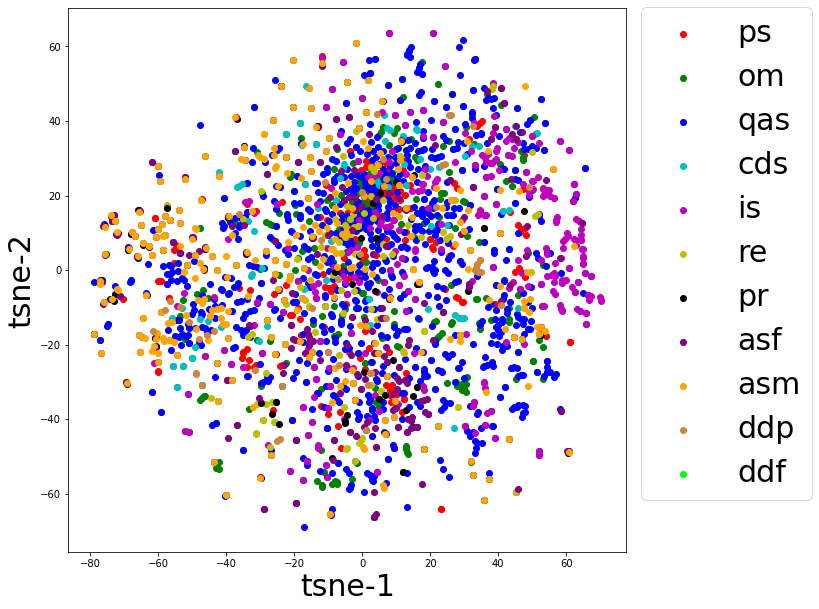

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(chan_model[hurtlex_new_df.words])

target_ids = range(1,len(hurtlex_new_df.label))


fig = plt.figure(figsize=(10,10))
colors = 'r', 'g', 'b', 'c', 'm', 'y','k','purple', 'orange','peru','lime',
for i, c, l in zip(target_ids, colors, hurtlex_new_df.label.unique()):
    plt.scatter(X_2d[hurtlex_new_df.target == i, 0], X_2d[hurtlex_new_df.target == i, 1], c=c, label=l)
    #plt.title("Distribution of Word2Vec-News embeddings of the words in different cateogries in the Hurtlex offensive lexicon", fontsize=14)
    plt.xlabel("tsne-1", fontsize=30)
    plt.ylabel("tsne-2", fontsize=30)

plt.legend(bbox_to_anchor=(1., 1.03),fontsize=30)

fig.savefig(images_folder+"/chan_tsne.eps", format='eps',bbox_inches='tight')            

In [ ]:
from sklearn import metrics
sample_silhouette_values = metrics.silhouette_samples(X_2d, hurtlex_df.target)
for i in range(11):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[hurtlex_df.target == i]
    print(hurtlex_df.label.unique()[i],np.mean(ith_cluster_silhouette_values))

ps -0.14192203
om -0.13276559
qas -0.17533825
cds -0.17416057
is -0.07181368
re 0.0047277366
pr 0.0021300057
asf -0.16692908
asm -0.17805396
ddp -0.13505274
ddf -0.16280955


## Silhoutte score

For n_clusters = 11 The average silhouette_score is : -0.13756575


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

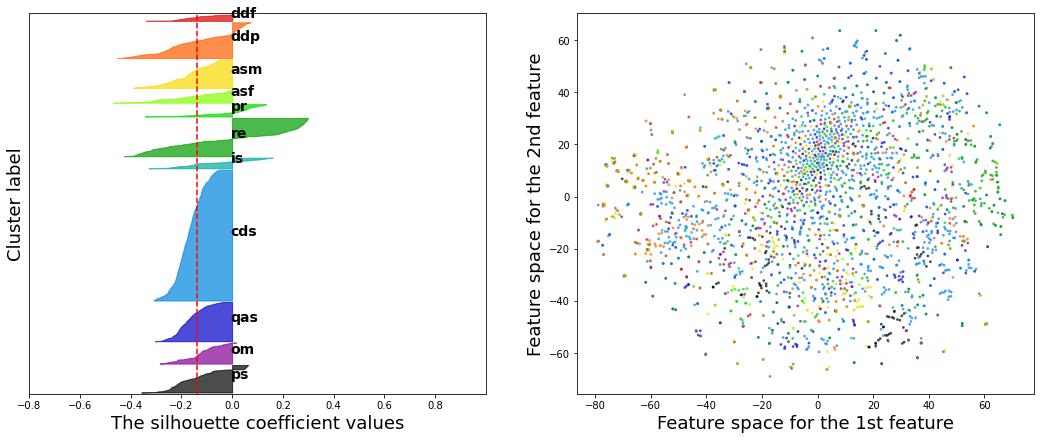

In [ ]:
def plot_silhouette_clusters(X_2d, cluster_labels_num,cluster_labels_str,range_n_clusters):
  import matplotlib.cm as cm
  from sklearn import metrics
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X_2d) + (n_clusters + 1) * 10])
      silhouette_avg = metrics.silhouette_score(X_2d, cluster_labels_num)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = metrics.silhouette_samples(X_2d, cluster_labels_num)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels_num == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.005, y_lower + 0.5 * size_cluster_i, cluster_labels_str[i],fontsize=14, fontweight='bold')

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      #ax1.set_title("The silhouette plot for the various clusters.", fontsize=18)
      ax1.set_xlabel("The silhouette coefficient values",fontsize=18)
      ax1.set_ylabel("Cluster label", fontsize=18)

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4,0.6,0.8])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels_num.astype(float) / n_clusters)
      ax2.scatter(X_2d[:, 0], X_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')
      # Labeling the clusters
     #centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #  c="white", alpha=1, s=200, edgecolor='k')

     # for i, c in enumerate(centers):
      #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
       #               s=50, edgecolor='k')

      #ax2.set_title("The visualization of the clustered data.", fontsize=18)
      ax2.set_xlabel("Feature space for the 1st feature", fontsize=18)
      ax2.set_ylabel("Feature space for the 2nd feature", fontsize=18)

      #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                 #   "with n_clusters = %d" % n_clusters),
                  #fontsize=18, fontweight='bold')
  return plt

plt = plot_silhouette_clusters(X_2d, hurtlex_df.target, hurtlex_df.label.unique(),[11])
plt.savefig(images_folder+"/chan_silhoutte_clusters.eps", format='eps',bbox_inches='tight')     


## Silhoute scores for KNN clustering of the embeddings

For n_clusters = 3 The average silhouette_score is : 0.38677722


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


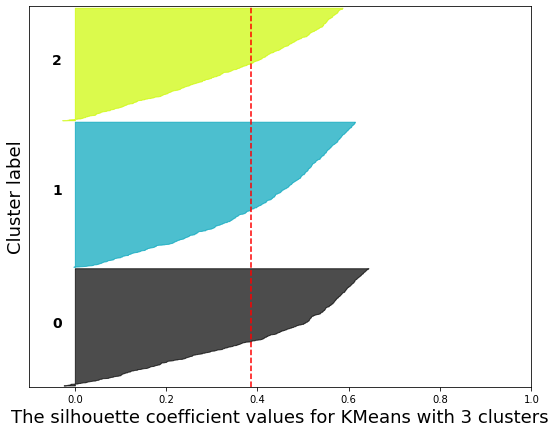

In [ ]:
def plot_silhouette_KNN_clusters(X,range_n_clusters):
  import matplotlib.cm as cm
  from sklearn import metrics
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_samples, silhouette_score

  for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),fontsize=14, fontweight='bold')

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values for KMeans with 3 clusters", fontsize=18)
    ax1.set_ylabel("Cluster label", fontsize=18)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
   # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
           #     c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  #  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
          #      c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
        #ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
              #      s=50, edgecolor='k')
#
    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature", fontsize=18)
    #ax2.set_ylabel("Feature space for the 2nd feature", fontsize=18)

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
            #      "with n_clusters = %d" % n_clusters),
             #    fontsize=14, fontweight='bold')
    return plt

plot_silhouette_KNN_clusters(X_2d,[3])
plt.savefig(images_folder+"/chan_silhoutte_clusters_Kmeans_3.eps", format='eps',bbox_inches='tight') 

For n_clusters = 2 The average silhouette_score is : 0.35781115
For n_clusters = 3 The average silhouette_score is : 0.38677722
For n_clusters = 4 The average silhouette_score is : 0.3857965
For n_clusters = 5 The average silhouette_score is : 0.37084892
For n_clusters = 6 The average silhouette_score is : 0.35104606
For n_clusters = 7 The average silhouette_score is : 0.35046235
For n_clusters = 8 The average silhouette_score is : 0.34855413
For n_clusters = 9 The average silhouette_score is : 0.33813322
For n_clusters = 10 The average silhouette_score is : 0.3429485
For n_clusters = 11 The average silhouette_score is : 0.349592


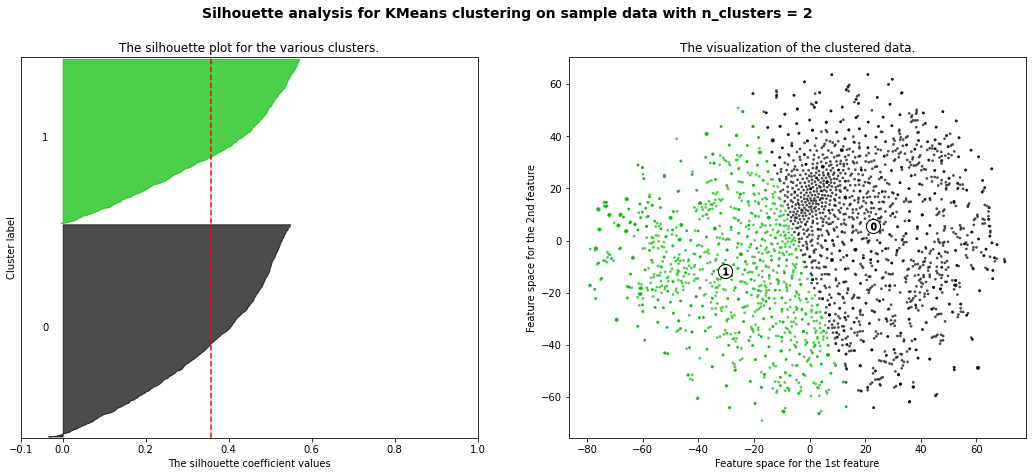

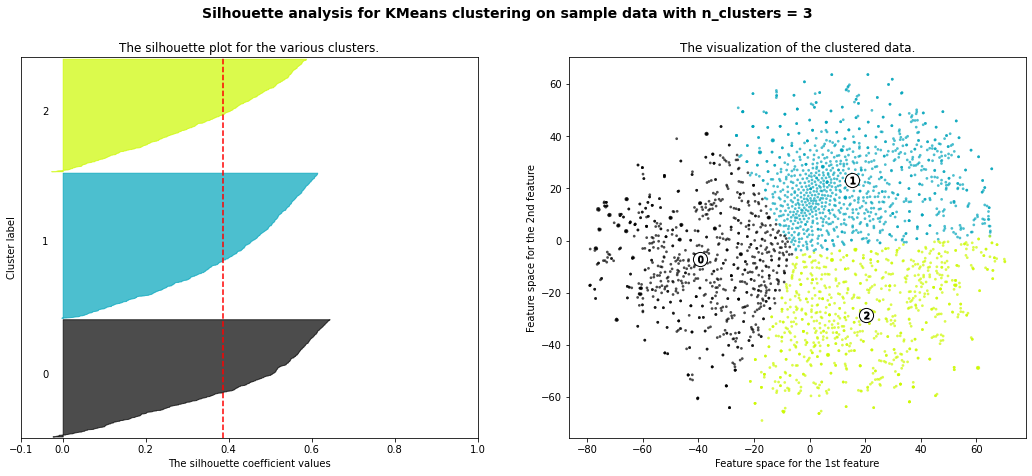

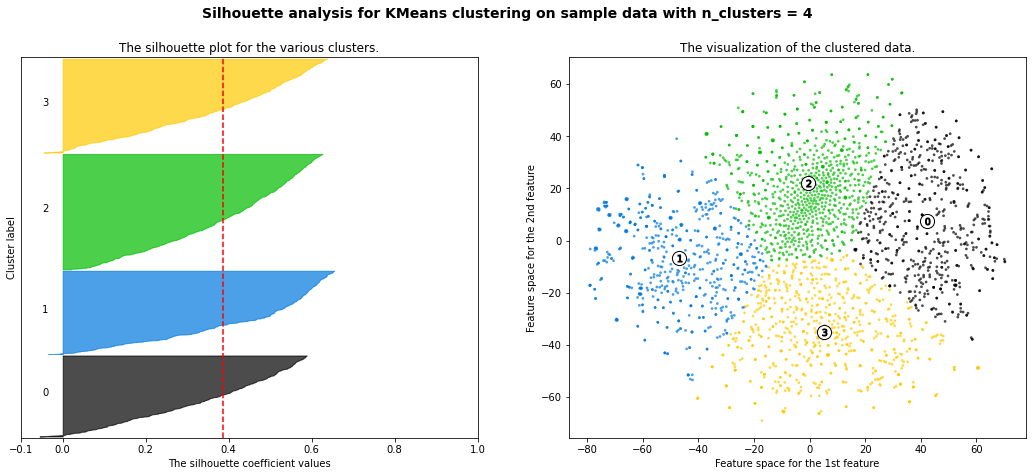

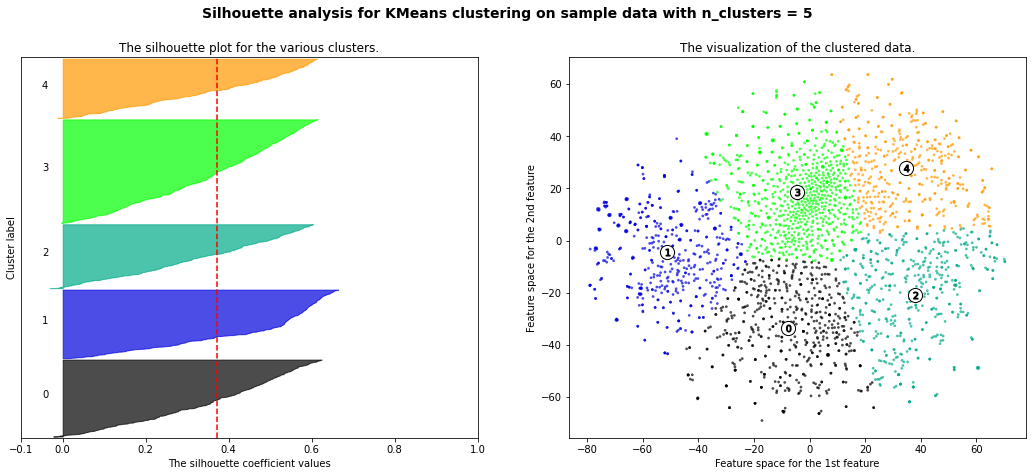

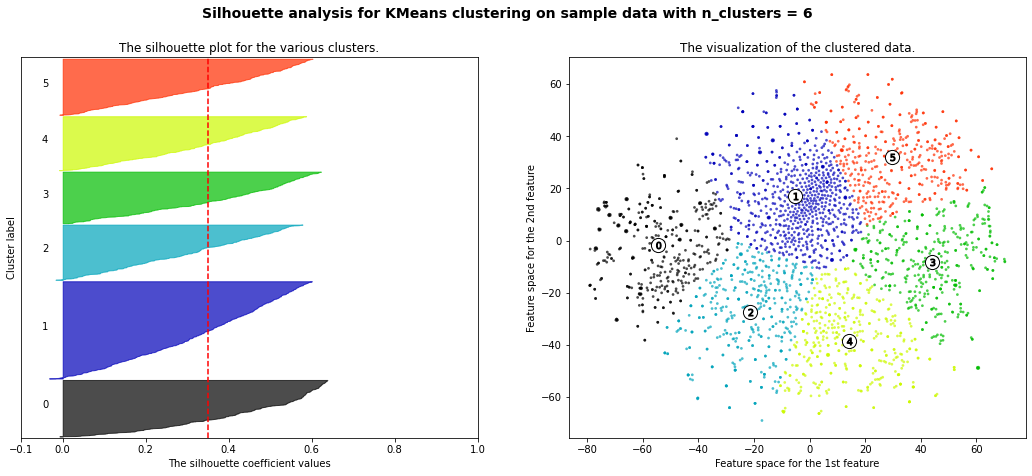

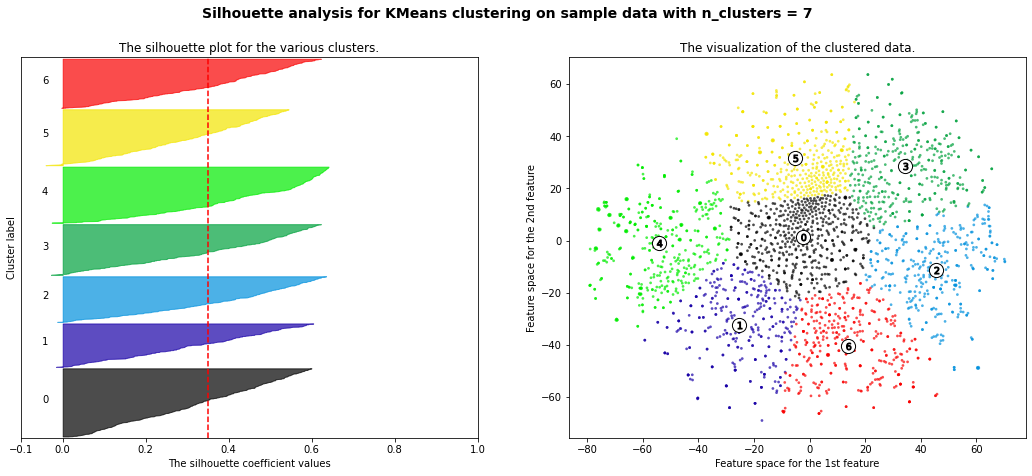

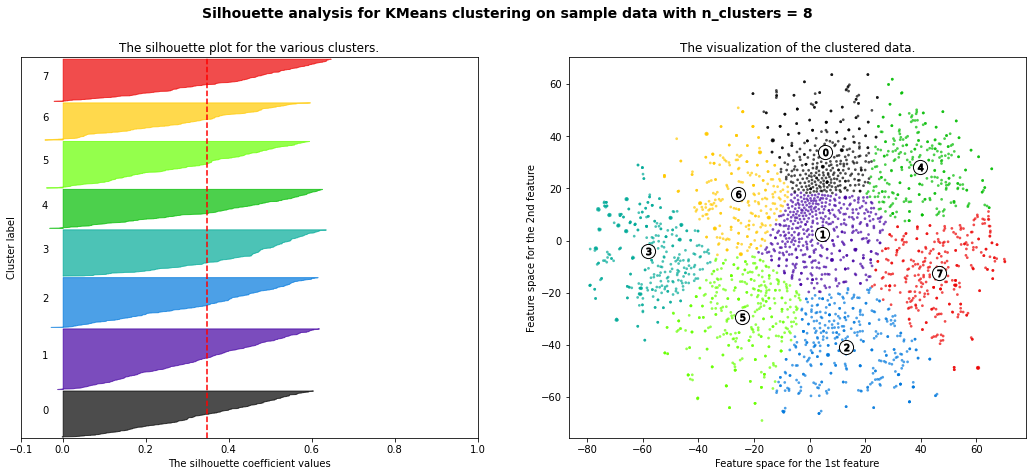

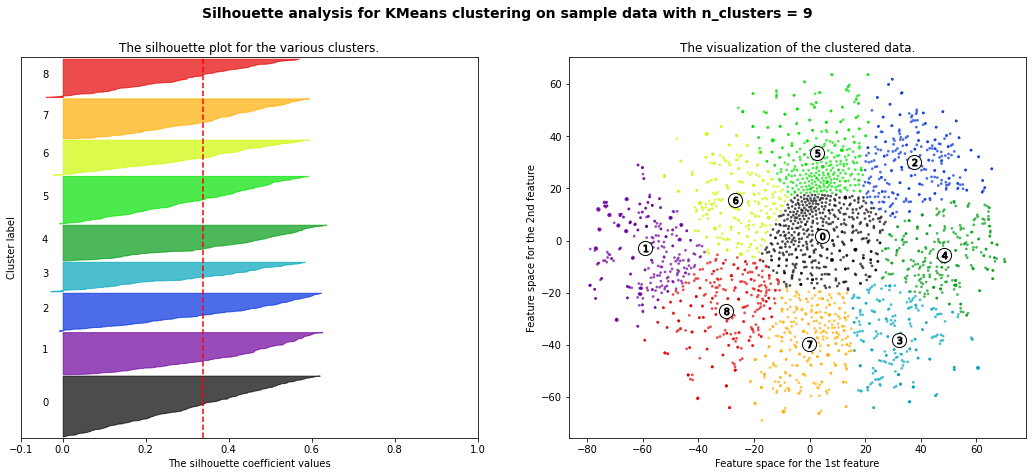

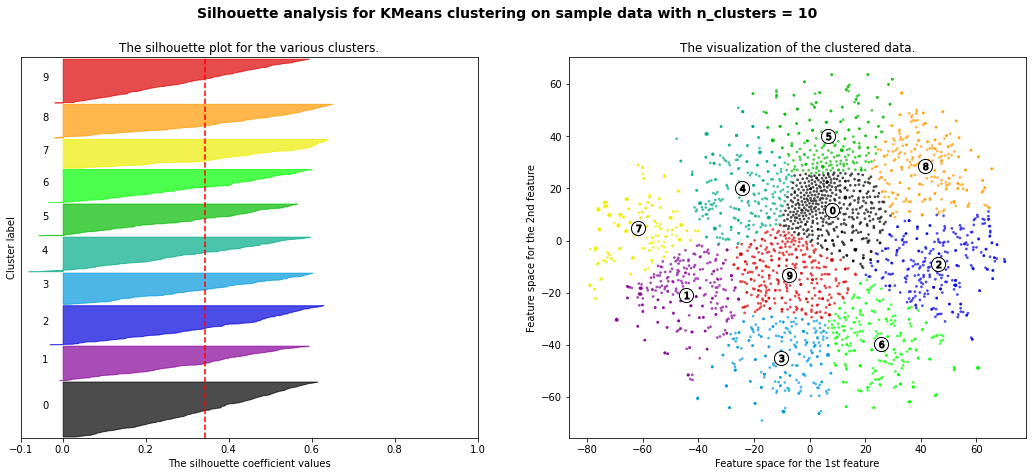

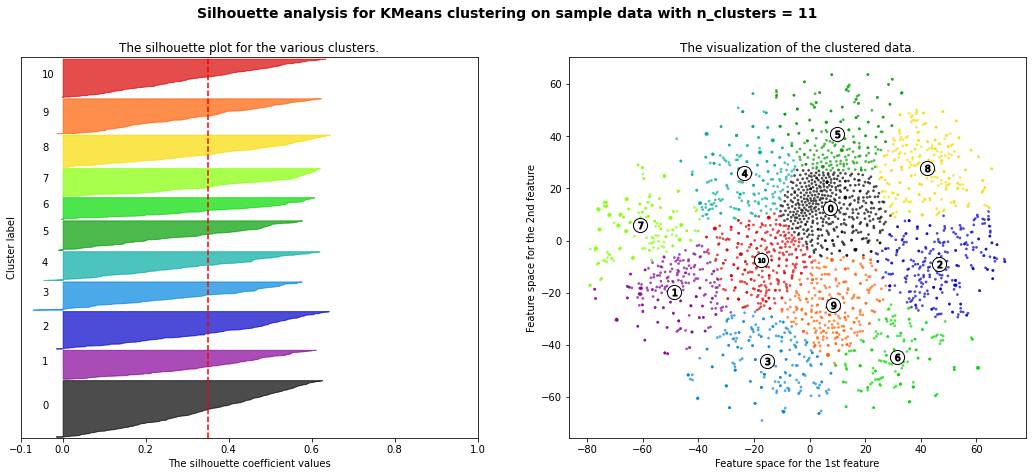

In [ ]:
plot_silhouette_KNN_clusters(X_2d,[2,3,4,5,6,7,8,9,10,11])

## Similarity scores

In [ ]:
def hurt_lex_category_similarities(words_list, model,category,ax):
  from itertools import combinations
  ps_all_pairs = combinations(words_list, 2)  
  ps_scored_pairs = [(model.wv.similarity(p[0], p[1]), p)
                for p in ps_all_pairs]
  ps_sorted_pairs = sorted(ps_scored_pairs, reverse=True)
  ps_similairty_scores = []
  for i in ps_sorted_pairs:
    ps_similairty_scores.append(i[0])
  print(np.mean(ps_similairty_scores))
  ax.hist(ps_similairty_scores)  
  ax.set_title(category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


0.13973211
0.13600305
0.15969156
0.102495275
0.06685369
0.074252464
0.095490746
0.1556485
0.103336126
0.13570778
0.12843865


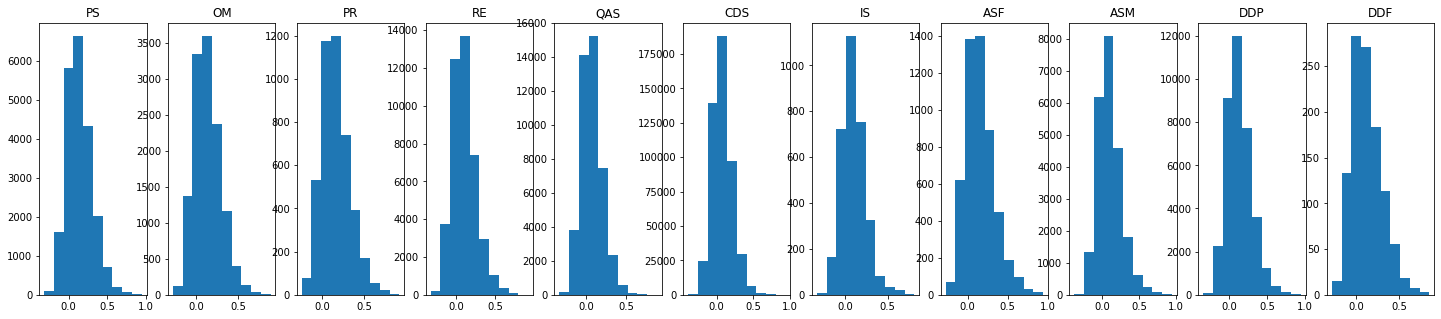

In [ ]:
fig, axs = plt.subplots(figsize=(25,5),ncols=11)
hurt_lex_category_similarities(ps_slur_words_in_chan, chan_model, "PS", axs[0])
hurt_lex_category_similarities(om_slur_words_in_chan, chan_model, "OM", axs[1])
hurt_lex_category_similarities(pr_slur_words_in_chan, chan_model, "PR", axs[2])
hurt_lex_category_similarities(re_slur_words_in_chan, chan_model, "RE", axs[3])
hurt_lex_category_similarities(qas_slur_words_in_chan, chan_model, "QAS", axs[4])
hurt_lex_category_similarities(cds_slur_words_in_chan, chan_model, "CDS", axs[5])
hurt_lex_category_similarities(is_slur_words_in_chan, chan_model, "IS", axs[6])
hurt_lex_category_similarities(asf_slur_words_in_chan, chan_model, "ASF", axs[7])
hurt_lex_category_similarities(asm_slur_words_in_chan, chan_model, "ASM", axs[8])
hurt_lex_category_similarities(ddp_slur_words_in_chan, chan_model, "DDP", axs[9])
hurt_lex_category_similarities(ddf_slur_words_in_chan, chan_model, "DDF", axs[10])


In [ ]:
def hurt_lex_category_similarities_file(words_list, model,category, file_path,model_name):
  from itertools import combinations
  ps_all_pairs = combinations(words_list, 2)  
  ps_scored_pairs = [(model.wv.similarity(p[0], p[1]), p)
              for p in ps_all_pairs]
  ps_sorted_pairs = sorted(ps_scored_pairs, reverse=True)
  np.savetxt(file_path+"/"+model_name+"_"+category+"_word_similarity.txt",ps_sorted_pairs,fmt="%s",delimiter=',')

results_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/Results"

hurt_lex_category_similarities_file(ps_slur_words_in_chan, chan_model, "PS", results_folder, "chan_model")
hurt_lex_category_similarities_file(om_slur_words_in_chan, chan_model, "OM", results_folder,"chan_model")
hurt_lex_category_similarities_file(pr_slur_words_in_chan, chan_model, "PR", results_folder,"chan_model")
hurt_lex_category_similarities_file(re_slur_words_in_chan, chan_model, "RE", results_folder,"chan_model")
hurt_lex_category_similarities_file(qas_slur_words_in_chan, chan_model, "QAS", results_folder,"chan_model")
hurt_lex_category_similarities_file(cds_slur_words_in_chan, chan_model, "CDS", results_folder,"chan_model")
hurt_lex_category_similarities_file(is_slur_words_in_chan, chan_model, "IS", results_folder,"chan_model")
hurt_lex_category_similarities_file(asf_slur_words_in_chan, chan_model, "ASF", results_folder,"chan_model")
hurt_lex_category_similarities_file(asm_slur_words_in_chan, chan_model, "ASM", results_folder,"chan_model")
hurt_lex_category_similarities_file(ddp_slur_words_in_chan, chan_model, "DDP", results_folder,"chan_model")
hurt_lex_category_similarities_file(ddf_slur_words_in_chan, chan_model, "DDF", results_folder,"chan_model")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## Chan embedding of the CB dataset visualization

In [ ]:
CB_data_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/Data/CB_Data"

In [ ]:
HateEval_train_df = pd.read_csv(CB_data_folder+"/HateEval/diverse_data_train.csv", index_col=False)
HateEval_test_df = pd.read_csv(CB_data_folder+"/HateEval/diverse_data_test.csv", index_col=False)

HateEval_df = pd.concat([HateEval_train_df,HateEval_test_df])
HateEval_df = HateEval_df.dropna()

In [ ]:
hateEVal_BOW = [i.split(" ") for i in HateEval_df.Text_clean]

In [ ]:
hateEval_word = []
for i in hateEVal_BOW:
  hateEval_word .append(find_lexicon_in_WE_vocab(i,chan_model))

In [ ]:
hateEval_word = [item for sublist in hateEval_word for item in sublist]

In [ ]:
tsne_hateval = TSNE(n_components=2, random_state=0)

hateEval_2d = tsne_hateval.fit_transform(chan_model[hateEval_word])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
plt.scatter(hateEval_2d[:, 0], hateEval_2d[:, 1])
#plt.title("Distribution of Word2Vec-News embeddings of the words in different cateogries in the Hurtlex offensive lexicon", fontsize=14)
plt.xlabel("tsne-1", fontsize=18)
plt.ylabel("tsne-2", fontsize=18)